<a href="https://colab.research.google.com/github/yogeswara97/gezzai-mobile/blob/main/Crypto_Risk_adjusted_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

# Step 1: Fetch Real Bitcoin Data from Yahoo Finance

In [ ]:
# Define the ticker and date range
btc_ticker = "BTC-USD"
start_date = "2023-01-01"  # You can adjust this
end_date = "2025-04-06"   # Up to today’s date (April 4, 2025)

# Download data
btc_data = yf.download(btc_ticker, start=start_date, end=end_date, interval="1d")

# Check if data is retrieved successfully
if btc_data.empty:
    raise ValueError("No data retrieved from Yahoo Finance. Check your internet connection or ticker symbol.")

btc_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-01-01,16625.080078,16630.439453,16521.234375,16547.914062,9244361700
2023-01-02,16688.470703,16759.343750,16572.228516,16625.509766,12097775227
2023-01-03,16679.857422,16760.447266,16622.371094,16688.847656,13903079207
2023-01-04,16863.238281,16964.585938,16667.763672,16680.205078,18421743322
2023-01-05,16836.736328,16884.021484,16790.283203,16863.472656,13692758566
...,...,...,...,...,...
2025-04-01,85169.171875,85487.367188,82429.359375,82551.921875,28175650319
2025-04-02,82485.710938,88466.953125,82343.539062,85180.609375,47584398470


# Step 2: Calculate Daily Returns

In [ ]:
btc_data["Returns"] = btc_data["Close"].pct_change().dropna()
btc_returns = btc_data["Returns"].dropna()  # Remove NaN values
btc_returns

,Returns
Date,
2023-01-02,0.003813
2023-01-03,-0.000516
2023-01-04,0.010994
2023-01-05,-0.001572
2023-01-06,0.006844
...,...
2025-04-01,0.031742
2025-04-02,-0.031507
2025-04-03,0.007482


# Step 3: Define Parameters

In [ ]:
risk_free_rate = 0.04 # Annuaized risk-free rate (4%, reasonable 2025)
days_per_year = 365
daily_rf = risk_free_rate / days_per_year # Daily risk-free rate

# Step 4: Calculate Metrics

In [ ]:
# Average return (annualized)
avg_return = btc_returns.mean() * days_per_year
excess_return = avg_return - risk_free_rate

# Total volatility (annualized)
total_volatility = btc_returns.std() * np.sqrt(days_per_year)

# Downside volatility (annualized)
downside_returns = btc_returns[btc_returns < daily_rf]
downside_volatility = downside_returns.std() * np.sqrt(days_per_year)

# Beta (using BTC as its own market proxy for simplicity; β = 1)
# For a real Treynor, you’d need a crypto index (e.g., "ETH-USD" or a broader index)
market_returns = btc_returns  # Simplified: Bitcoin as the market
covariance = np.cov(btc_returns, market_returns)[0, 1]
market_variance = market_returns.var()
beta = covariance / market_variance if market_variance != 0 else 1.0

# Step 5: Calculate Ratios


In [ ]:
sharpe_ratio = excess_return / total_volatility
sortino_ratio = excess_return / downside_volatility
treynor_ratio = excess_return / beta

# Step 6: Print Results


In [ ]:
print(f"Bitcoin Risk-Adjusted Returns (Annualized) from {start_date} to {end_date}:")
print(f"Average Annual Return: {avg_return:.4f} ({avg_return*100:.2f}%)")
print(f"Excess Return: {excess_return:.4f} ({excess_return*100:.2f}%)")
print(f"Total Volatility: {total_volatility:.4f} ({total_volatility*100:.2f}%)")
print(f"Downside Volatility: {downside_volatility:.4f} ({downside_volatility*100:.2f}%)")
print(f"Beta: {beta:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Treynor Ratio: {treynor_ratio:.4f} ({treynor_ratio*100:.2f}%)")

Bitcoin Risk-Adjusted Returns (Annualized) from 2023-01-01 to 2025-04-06:
Average Annual Return: 0.8345 (83.45%)
Excess Return: 0.7945 (79.45%)
Total Volatility: 0.4921 (49.21%)
Downside Volatility: 0.3050 (30.50%)
Beta: 1.0000
Sharpe Ratio: 1.6146
Sortino Ratio: 2.6048
Treynor Ratio: 0.7945 (79.45%)



# Optional: Plot prices and returns


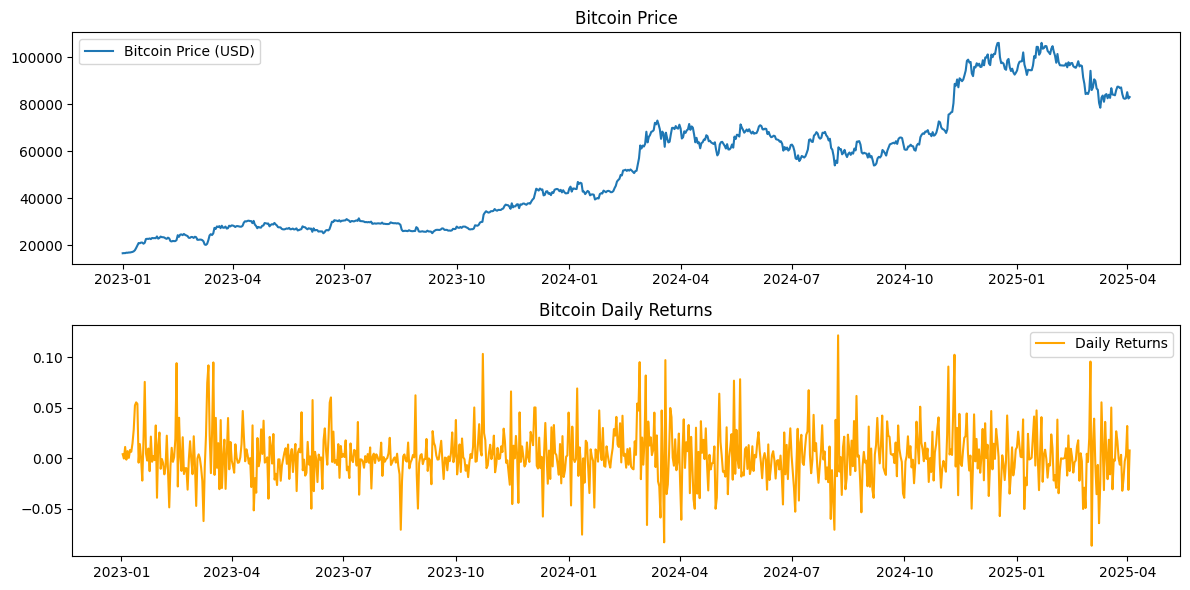

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(btc_data["Close"], label="Bitcoin Price (USD)")
plt.title("Bitcoin Price")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(btc_data["Returns"], label="Daily Returns", color="orange")
plt.title("Bitcoin Daily Returns")
plt.legend()
plt.tight_layout()
plt.show()